# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df_titanic=pd.read_csv("titanicnew.csv")

In [3]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


About the dataset
From the dataset we can assume the following things:

Survived: 0 = No(Dead) and 1 = Yes(Survived)
Pclass=Passenger's class: 1 = Upper class, 2 = Middle class, 3 = Lower class
SibSp: It indicates the passenger's relation with siblings and Spouse.
Parch: It indicates the passenger's relation with parents.
Embarked: The ports of embarkations are C = Cherbourg, Q = Queenstown and S = Southampton.

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Starting the EDA

In [6]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_titanic.shape

(891, 12)

We can observe, the dataset contains 12 columns which contains both numerical and categorical data types. There are total 11 independent(predictor) columns and remaining one "Survived" is the dependent(target) variable. 
We can also see that Ticket column contains both numeric and alphanumeric data type and Cabin contains alphanumeric data type.

The target variable related to survival of passengers is labelled as 1 = Yes and 0 = No.
And thus we will be building classification model

In [8]:
#Checking for null values
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Value Obs- We can see "Cabin" columns has 687 null entries and it wouldn't be appropriate to do imputation on this column, so we will be dropping it further.
Since Embarked has only 2 null values, we can delete those rows further.

In [9]:
#Checking the number of unique values in all columns
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

obs-"PassengerId" and "Name" have all the unique values

In [10]:
#Checking data types of all columns
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

dtypes Obs-The dataset contains mixed datatypes, few columns being continuous types and other few being categorical types

In [11]:
#Obtaining description of all columns
df_titanic.describe(include="all") #added "all" since categorical data present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Description Obs- 
1. The mean in column "Survived","SibSp","Parch","Fare" is considerably high than median and thus we can predict right skewness is present
2. The mean in column "Pclass" is considerably low than median and thus we can predict left skewness is present
3. The max of columns "Age","SibSp","Parch","Fare" is unboundably higher than 75% and hence we predict high outliers must be present in these columns
4. For all the categorical columns we will be treating them further

# Data Cleaning and Pre-Processing

### Deleting the unwanted columns and filling null values column
We have mentioned above that we will be dropping "Cabin" columns as it has 687 null entries
PassengerId,Name are not required for model performance so we will drop that. Also, Ticket name has associated fare column, so even that is not reuired.

In [12]:
drop_columns=['PassengerId','Name','Ticket','Cabin']
df_titanic.drop(drop_columns,axis = 1,inplace = True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Using of fillna technique to impute the missing values in "Age" Column

In [13]:
df_titanic.shape

(891, 8)

In [14]:
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())

In [15]:
df_titanic["Age"].isnull().sum()

0

Since Embarked have only 2 NaN values, dropping those two rows

In [16]:
df_titanic.dropna(inplace=True)

In [17]:
df_titanic["Embarked"].isnull().sum()

0

### Data Visualization

##### Univariate Analysis

0    549
1    340
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

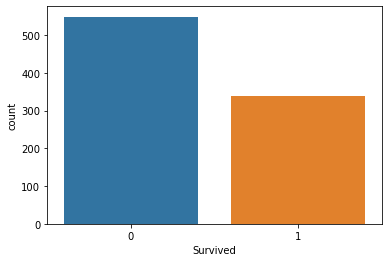

In [18]:
print(df_titanic["Survived"].value_counts())
sns.countplot(x="Survived", data=df_titanic)

Obs- We can see the no. of passengers survived =342 and who died =549
since 'Survived' is our target column, and there is imbalance in data, we will be balancing it later

3    491
1    214
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

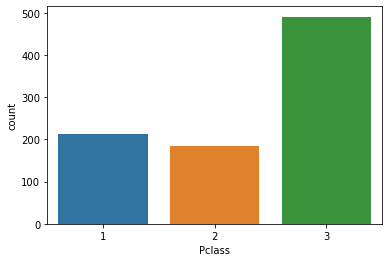

In [19]:
print(df_titanic["Pclass"].value_counts())
sns.countplot(x="Pclass", data=df_titanic)

Obs-As the tickets rate are higher for Pclass=1 is highest and Lowest for Pclass=3 , We can observe the No. of Passengers are highest for Pclass=3

male      577
female    312
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

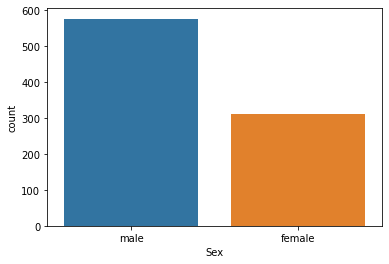

In [20]:
print(df_titanic["Sex"].value_counts())
sns.countplot(x="Sex", data=df_titanic)

Obs-The number of males were more than female on that day

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

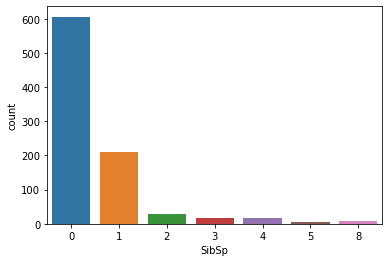

In [21]:
print(df_titanic["SibSp"].value_counts())
sns.countplot(x="SibSp", data=df_titanic)

Obs-There were few passengers siblings alon_with each other

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

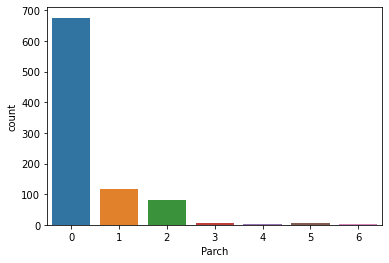

In [22]:
print(df_titanic["Parch"].value_counts())
sns.countplot(x="Parch", data=df_titanic)

Obs-There were again very few parents with their child

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

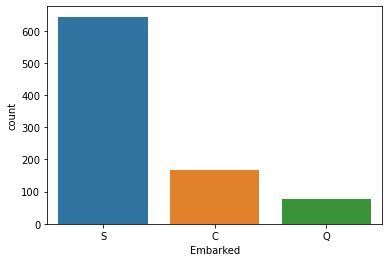

In [23]:
print(df_titanic["Embarked"].value_counts())
sns.countplot(x="Embarked", data=df_titanic)

obs-port of embarkation C= cherbourg , Q = Queenstown, S = Southampton

<AxesSubplot:xlabel='Fare', ylabel='Density'>

<Figure size 720x1440 with 0 Axes>

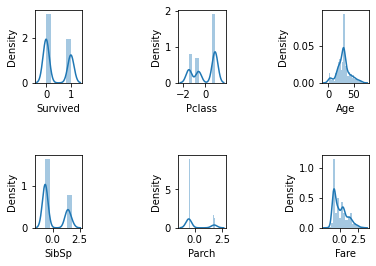

In [91]:
# Next, we will plot distribution plot of all columns in same figure(to check skewness)
plt.figure(figsize=(10,20))
fig, axes = plt.subplots(2,3)
fig.subplots_adjust(hspace=1, wspace=2)

sns.distplot(df_titanic['Survived'], ax=axes[0,0])
sns.distplot(df_titanic['Pclass'], ax=axes[0,1])
sns.distplot(df_titanic['Age'], ax=axes[0,2])
sns.distplot(df_titanic['SibSp'], ax=axes[1,0])
sns.distplot(df_titanic['Parch'], ax=axes[1,1])
sns.distplot(df_titanic['Fare'], ax=axes[1,2])

Obs- We can observe the data is lightly skewed in columns "Pclass","Age" and highly skewed in "SibSp","Parch","Fare" 

Survived       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Pclass      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Age         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.227941x0.343182)
Parch          AxesSubplot(0.398529,0.125;0.227941x0.343182)
Fare           AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

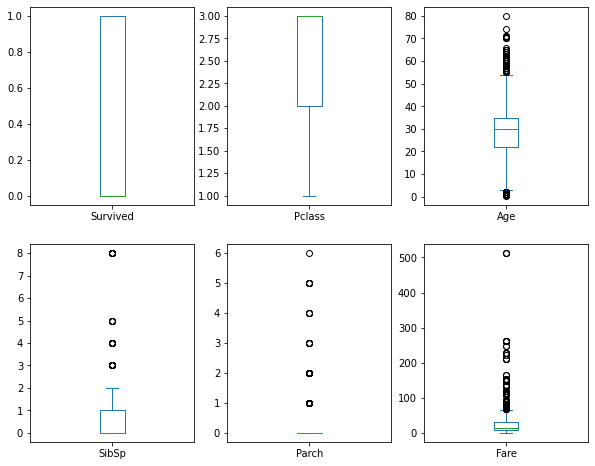

In [25]:
#Next, we will plot box plot of all columns in same figure(to check outliers)
df_titanic.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,8))

Obs-We can see outliers are present in the columns-"Age","sibSp","Parch","Fare"

##### Bivariate Analysis

0    549
1    340
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

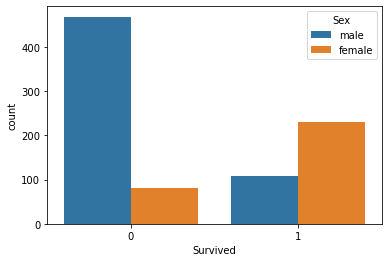

In [26]:
print(df_titanic["Survived"].value_counts())
sns.countplot(x="Survived", data=df_titanic,hue="Sex")

Obs-From the total 577 Males, we can see nearly only 100's survived and out of the total 314 Females nearly 250's survived. That shows women were tried to save first

3    491
1    214
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

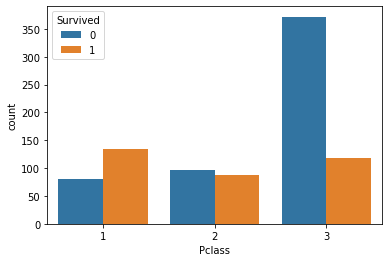

In [27]:
print(df_titanic["Pclass"].value_counts())
sns.countplot(x="Pclass", data=df_titanic, hue="Survived")

Obs-We can clearly see the percentage of survival of PClass=1 is high and Pclass=3 survival-percentage was least

<AxesSubplot:title={'center':'Comparision between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

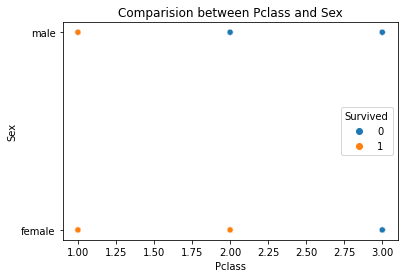

In [28]:
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df_titanic['Pclass'],df_titanic['Sex'],hue=df_titanic["Survived"])

Obs-We can observe that in "Pclass=1", both male and female were saved, in "Pclass=2", female were saved and for "Pclass=3", both were not saved 
One of the reason of that can be higher class accomodation is on top of ship and lowe class's towards down

##### Multivariate Analysis

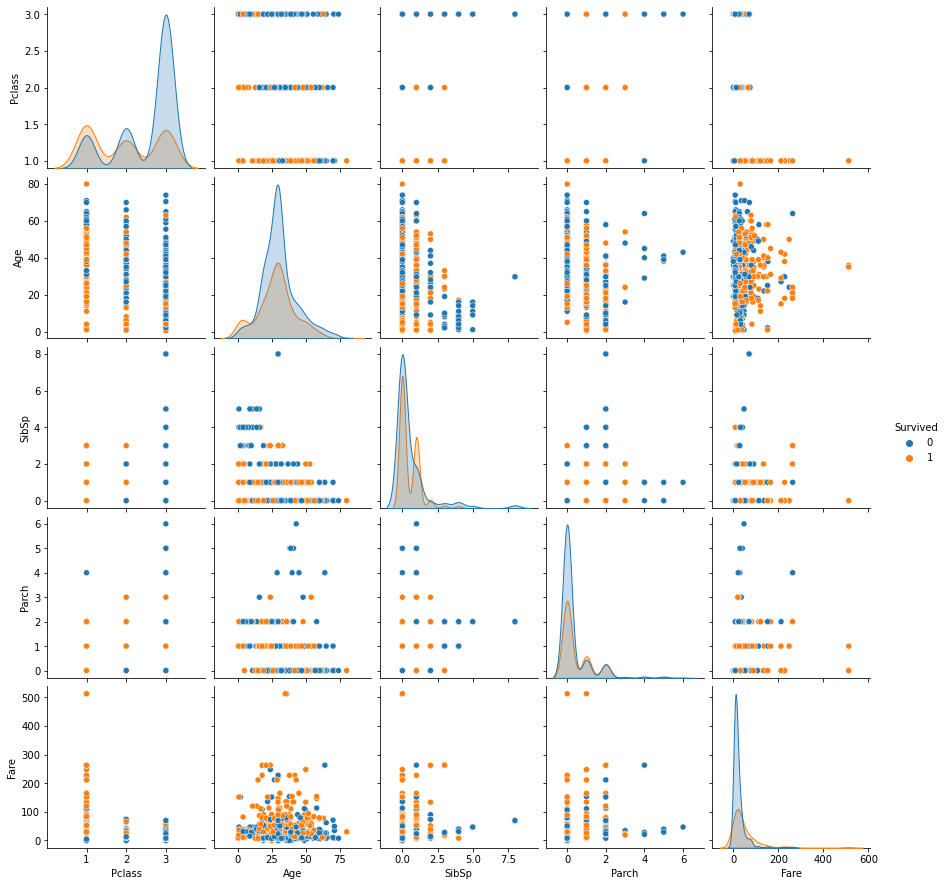

In [29]:
sns.pairplot(df_titanic,hue="Survived")

Obs- We have plotted different pairs of column against each other using pair plot
We can see "PClass=1" since belonged to higher class siblings together were saved, again fare"Pclass=1" is high and also the survival was high

### Encoding Categorical Data

In [30]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])
df_titanic['Embarked']=le.fit_transform(df_titanic['Embarked'])
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


Obs- The Label Encoder has encoded the categorical values as:

"Sex": Male-1, Female-0 

"Emabarked Ports": 0-C(Cherbourg) ,1-Q(Queenstown), 2-S(Southampton)

### Checking Correlation

In [31]:
df_titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


<AxesSubplot:>

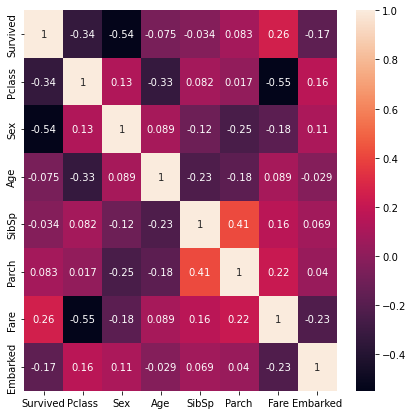

In [32]:
#displaying Correlation using heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df_titanic.corr(),annot=True)

Obs-Moderately Negtative Correalated- ("Sex" and "Survived") ("PClass" and "Fare")

    Moderately Positive correlated-("SibSp and Parch")

However, the columns aren't highly corealted to each other so we can say multi-collinearity is not present

# Data Transformation

### Checking for skewness

In [33]:
df_titanic.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

Obs-Except for Columns "Survived" and "Age" all other are skewed, so applying normalization techniques and checking the skewness further

### Applying Transformation Method

In [34]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #deafault method=boxcox

skew_col = ["Pclass","Sex","SibSp","Parch","Fare","Embarked"]
df_titanic[skew_col]= pt.fit_transform(df_titanic[skew_col].values)

In [35]:
df_titanic.skew()

Survived    0.484568
Pclass     -0.444702
Sex        -0.625625
Age         0.431720
SibSp       0.805424
Parch       1.225383
Fare       -0.041424
Embarked   -1.061486
dtype: float64

Obs-We can observe there is a considerable decrease in the skewness after the transformation

### Checking for outliers

In [36]:
# Method 1: Z-score
from scipy.stats import zscore
z=np.abs(zscore(df_titanic))
threshold=3
print(np.where(z>3))

(array([ 95, 115, 178, 262, 270, 276, 301, 412, 465, 480, 492, 596, 629,
       632, 671, 673, 731, 744, 805, 814, 821, 849], dtype=int64), array([3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 6, 6, 3],
      dtype=int64))


Obs-From the box plot, we already visualized outliers were present earlier in multiple columns.

Here it is exactly showing the locations where outliers are present, removing these locations data further

In [37]:
df_titanic_new=df_titanic[(z<3).all(axis=1)]

In [38]:
print("df_titanic.shape:",df_titanic.shape, "\ndf_titanic_new.shape:",df_titanic_new.shape)

df_titanic.shape: (889, 8) 
df_titanic_new.shape: (867, 8)


In [39]:
# Let's check the the data loss
data_loss = (889-867)/889*100
data_loss

2.4746906636670416

In [40]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_titanic.quantile(0.25)
Q3=df_titanic.quantile(0.75)
IQR=Q3 - Q1

df_titanic_new2=df_titanic[~((df_titanic < (Q1 - 1.5 * IQR)) |(df_titanic > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
print("df_titanic.shape:",df_titanic.shape, "\ndf_titanic_new2:",df_titanic_new2.shape)

df_titanic.shape: (889, 8) 
df_titanic_new2: (626, 8)


In [42]:
# Let's check the the data loss
data_loss2 = (889-626)/889*100
data_loss2

29.58380202474691

Obs- The Data Loss in IQR method is very high, so we will be going with Z-score method

In [43]:
df_titanic=df_titanic_new # Assigning back the new created dataframe

In [44]:
df_titanic.shape

(867, 8)

### Creating Input(Predictor) and Output(Target) Columns

In [45]:
x=df_titanic.drop(columns=['Survived'],axis=1)
y=df_titanic['Survived']

In [46]:
x.shape

(867, 7)

In [47]:
y.shape

(867,)

### Data Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale

array([[ 0.85029924,  0.74977474, -0.5809341 , ..., -0.56865883,
        -1.04716434,  0.61669686],
       [-1.48053709, -1.33373391,  0.69867007, ..., -0.56865883,
         1.43361335, -1.76348931],
       [ 0.85029924, -1.33373391, -0.26103306, ..., -0.56865883,
        -0.94770181,  0.61669686],
       ...,
       [ 0.85029924, -1.33373391,  0.03480484, ...,  1.82020423,
         0.26090385,  0.61669686],
       [-1.48053709,  0.74977474, -0.26103306, ..., -0.56865883,
         0.52851421, -1.76348931],
       [ 0.85029924,  0.74977474,  0.2188185 , ..., -0.56865883,
        -0.97267425, -1.21968835]])

In [49]:
x=pd.DataFrame(data=x_scale)

### Checking for Imbalance 

In [50]:
print(y.value_counts())

0    529
1    338
Name: Survived, dtype: int64


Obs-We can see the target is imbalanced, and therefore we need to balance it.

#### Oversampling using SMOTE

pip install imblearn

In [51]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [52]:
print(y.value_counts())

0    529
1    529
Name: Survived, dtype: int64


# Data Modelling

### Finding Best Random State 

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8377358490566038  on Random_state  94


### Splitting  data into Train-Test

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94)

In [55]:
x_train.shape

(793, 7)

In [56]:
y_train.shape

(793,)

In [57]:
x_test.shape

(265, 7)

In [58]:
y_test.shape

(265,)

## Using various Machine Learning Algorithms

In [59]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Logistic Regression

In [60]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.8377358490566038
Confusion Matrix:
 [[118  14]
 [ 29 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       132
           1       0.88      0.78      0.83       133

    accuracy                           0.84       265
   macro avg       0.84      0.84      0.84       265
weighted avg       0.84      0.84      0.84       265



Obs- The Logistic Regression has provided the accuracy_score:0.8037735849056604 and f1-score:0.80

### 2. GaussianNB

In [61]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7924528301886793
Confusion Matrix:
 [[110  22]
 [ 33 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       132
           1       0.82      0.75      0.78       133

    accuracy                           0.79       265
   macro avg       0.79      0.79      0.79       265
weighted avg       0.79      0.79      0.79       265



Obs- The GaussianNB has provided the accuracy_score:0.7886792452830189 and f1-score:0.79

### 3.Decision Tree Classifier

In [62]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.7773584905660378
Confusion Matrix:
 [[107  25]
 [ 34  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       132
           1       0.80      0.74      0.77       133

    accuracy                           0.78       265
   macro avg       0.78      0.78      0.78       265
weighted avg       0.78      0.78      0.78       265



Obs- The Decision Tree Classifier has provided the accuracy-score:0.7849056603773585 and f1-score:0.79

### 4.K Nearest Neighbor Classifier

In [63]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.8301886792452831
Confusion Matrix:
 [[115  17]
 [ 28 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       132
           1       0.86      0.79      0.82       133

    accuracy                           0.83       265
   macro avg       0.83      0.83      0.83       265
weighted avg       0.83      0.83      0.83       265



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.8377358490566038 and f1-score:0.84

### 5.Support Vector Machine Classifier

In [64]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8264150943396227
Confusion Matrix:
 [[122  10]
 [ 36  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       132
           1       0.91      0.73      0.81       133

    accuracy                           0.83       265
   macro avg       0.84      0.83      0.82       265
weighted avg       0.84      0.83      0.82       265



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.8075471698113208 and f1-score:0.82

### 6. Ensemble Methods
#### 6.1 Random Forest Classifier

In [65]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.8264150943396227
Confusion Matrix:
 [[114  18]
 [ 28 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       132
           1       0.85      0.79      0.82       133

    accuracy                           0.83       265
   macro avg       0.83      0.83      0.83       265
weighted avg       0.83      0.83      0.83       265



Obs- The Random Forest Classifier has provided the accuracy-score:0.8452830188679246 and f1-score:0.85

#### 6.2 Ada Boost Classifier

In [66]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8377358490566038
Confusion Matrix:
 [[118  14]
 [ 29 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       132
           1       0.88      0.78      0.83       133

    accuracy                           0.84       265
   macro avg       0.84      0.84      0.84       265
weighted avg       0.84      0.84      0.84       265



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8188679245283019 and f1-score:0.82

#### 6.3 Gradient Boosting Classifier

In [67]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.8490566037735849
Confusion Matrix:
 [[119  13]
 [ 27 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       132
           1       0.89      0.80      0.84       133

    accuracy                           0.85       265
   macro avg       0.85      0.85      0.85       265
weighted avg       0.85      0.85      0.85       265



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.8452830188679246 and f1-score:0.85

### Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# cv score for Logistic Regression 
print('CV score  for Logistic rgerssion',cross_val_score(lg,x,y,cv=5).mean())

CV score  for Logistic rgerssion 0.7864168827684879


In [70]:
# cv score for Gaussian NB 
print('CV score  for Gaussian NB ',cross_val_score(gnb,x,y,cv=5).mean())

CV score  for Gaussian NB  0.749575248144505


In [71]:
# cv score for Decision Tree Classifier 
print('CV score  for Decision Tree Classifier ',cross_val_score(dtc,x,y,cv=5).mean())

CV score  for Decision Tree Classifier  0.8034650809264063


In [72]:
# cv score for K Neighbors Classifier 
print('CV score  for K Neighbors Classifier ',cross_val_score(knn,x,y,cv=5).mean())

CV score  for K Neighbors Classifier  0.8110122507377268


In [73]:
# cv score for Support Vector Machine Classifier 
print('CV score  for Support Vector Machine Classifier ',cross_val_score(svc,x,y,cv=5).mean())

CV score  for Support Vector Machine Classifier  0.7958732003934543


In [74]:
# cv score for Random Forest Classifier
print('CV score  for Random Forest Classifier ',cross_val_score(rf,x,y,cv=5).mean())

CV score  for Random Forest Classifier  0.8185638916212108


In [75]:
# cv score for Ada Boost Classifier
print('CV score  for Ada Boost Classifier ',cross_val_score(ad,x,y,cv=5).mean())

CV score  for Ada Boost Classifier  0.7892694268085487


In [76]:
# cv score for GradientBoostingClassifier
print('CV score  for GradientBoostingClassifier ',cross_val_score(gb,x,y,cv=5).mean())

CV score  for GradientBoostingClassifier  0.8260931771438791


Obs-From the observation of accuracy and cross validation score and their difference we can predict that Gradient Boosting Classifier is the best model.

## Hyper Parameter Tuning

In [77]:
gb.get_params() # Getting List of parameters for Gradient Bossting Algorithm

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
#Selecting few parameter list to pass in Gradient Boosting 
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'learning_rate': [0.1, 1, 10, 100, 1000],
             'n_estimators': [100, 150, 200],
             'criterion':['friedman_mse', 'squared_error'],
              'max_depth':[2,3,4]}

In [79]:
GCV = GridSearchCV(gb,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


0.8490566037735849

In [80]:
#Applying best parameter values on GradientBoosting Algorithm 
titanic_best=GradientBoostingClassifier()
titanic_best.fit(x_train,y_train)
predgb1=titanic_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb1))
print("Classification Report:\n",classification_report(y_test,predgb1))

Accuracy: 0.8490566037735849
Confusion Matrix:
 [[119  13]
 [ 27 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       132
           1       0.89      0.80      0.84       133

    accuracy                           0.85       265
   macro avg       0.85      0.85      0.85       265
weighted avg       0.85      0.85      0.85       265



Obs-The Gradient Boosting Algorithm gives accuracy_score:0.8452830188679246 after tuning

### Plotting ROC-AUC curve for best model

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

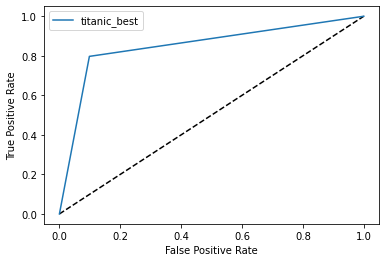

In [82]:
fpr,tpr,threshholds=roc_curve(y_test,predgb)
auc = roc_auc_score(y_test,predgb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='titanic_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. Gradient Boosting Classifier has AUC(area under curve)=83.01%

### Saving the best model

In [83]:
import joblib

joblib.dump(titanic_best,'Titanic.obj')

['Titanic.obj']

In [84]:
titanic_model=joblib.load('Titanic.obj')

In [85]:
titanic_model

GradientBoostingClassifier()

### Predicting the Output

In [86]:
ori = np.array(y_test)
predicted = np.array(titanic_best.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
260,0,0
261,0,0
262,1,0
263,1,1
